# John Gomes
# ME5311 Your first CFD problem 

This example solves a steady-state 1D conduction problem. From a partial differential equation point of view, the equation is elliptic. The discretization in the example is based on the finite-volume method. 

The program is structured as follows, which is a recommendated form of programming when solving physical problems. 

1. List all the physical parameters % L, k, q, TA, TB
2. Define all the numerical paramters % N, dx, cell center location x(N)
3. Setting up A matrix: first setting up the interior points, then boundary points
4. Setting up b vector: first setting up the interior points, then boundary points
5. Solve for T
6. Plot T as a function of x, and potentially compared with analytical solutions. 

In [47]:
## Load necessary packages
import numpy as np
import matplotlib.pyplot as plt

In [48]:
##Physical and numerical parameters
L = 0.02; # m, length of the 1D domain
k = 0.5; # W/mK, thermal conductivity of the material
q = 1000000; # W/m3, volumetric heat release rate
TA = 100; #Celsius, left boundary at fixed temperature
TB = 200; #Celsius, right boundary at fixed temperature
## Numerical Paramteres
N = 5; # number of cells during discretization 
dx = L/N; # length of each computational cell
Xc = np.zeros(N); # coordinates at the center of each cell
for i in range(0, N):
        Xc[i] = i*dx + 0.5*dx

qsrc=np.zeros(N);

for i in range(0,N):
    qsrc[i] = q; # A constant heat source term for the conduction problem
   
print(qsrc)

[1000000. 1000000. 1000000. 1000000. 1000000.]


In [49]:
## Set up the A matrix. 
## Note that A is a mostly zero (sparse matrix), so we first fill A with all zero entries. 
A = np.zeros((N,N));
for i in range(1,N-1):
    A[i,i] = -2*k/dx;
    A[i,i+1] = k/dx; # The first index indicates cell ID
    A[i,i-1] = k/dx; # The second index indicates the cells involved
# for left boundary
A[0,0] = -3*k/dx;
A[0,1] = k/dx;
# for right boundary
A[N-1,N-1] = -3*k/dx;
A[N-1,N-2] = k/dx;
#print(A)

In [50]:
## Set up b vector
b=np.zeros(N);
for i in range(1,N-1):
    b[i] = -qsrc[i]*dx;
#left boundary
    b[0] = -qsrc[0]*dx - 2*k*TA/dx;
#right boundary
    b[N-1] = -qsrc[N-1]*dx -2*k*TB/dx;
#print(b)

In [51]:
# solve for Temperature
T = np.linalg.solve(A,b)
#print(T)

In [52]:
# analytical solution for steady-state 1D conduction with a constant source q
def analytical_solution(x,q,L,k,TA,TB):
    return -q/2/k*x*x + (TB-TA+q*L*L/2/k)*x/L+TA

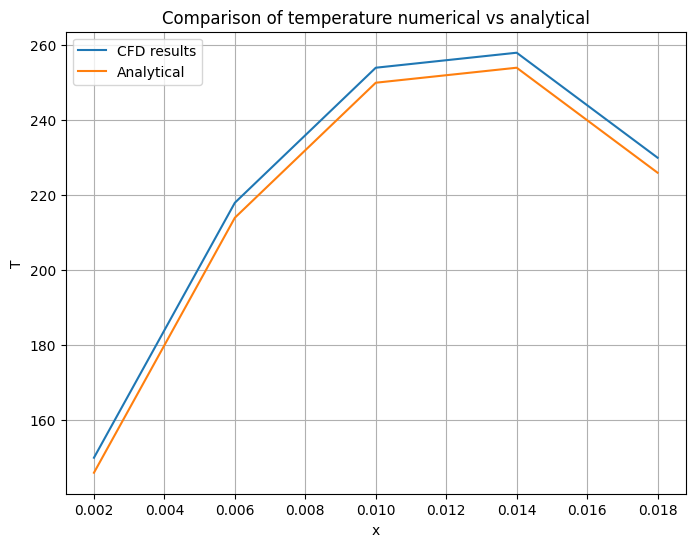

In [53]:
# plot the results 
analytical_results = analytical_solution(Xc,q,L,k,TA,TB) 
plt.figure(figsize=(8, 6))
plt.plot(Xc, T, label='CFD results')
plt.plot(Xc, analytical_results, label='Analytical') 

plt.xlabel('x')
plt.ylabel('T')
plt.title('Comparison of temperature numerical vs analytical')
plt.legend()
plt.grid()
plt.show()

## Exercise 1 
Increase the number of cells by changing the parameter in the first block and observe the agreement between the analytical and numerical solution. 



In [61]:
N = 10 #################double N here

dx = L/N; # length of each computational cell
Xc = np.zeros(N); # coordinates at the center of each cell
for i in range(0, N):
        Xc[i] = i*dx + 0.5*dx

qsrc=np.zeros(N);

for i in range(0,N):
    qsrc[i] = q; # A constant heat source term for the conduction problem
   
print(qsrc)
## Set up the A matrix. 
## Note that A is a mostly zero (sparse matrix), so we first fill A with all zero entries. 
A = np.zeros((N,N));
for i in range(1,N-1):
    A[i,i] = -2*k/dx;
    A[i,i+1] = k/dx; # The first index indicates cell ID
    A[i,i-1] = k/dx; # The second index indicates the cells involved
# for left boundary
A[0,0] = -3*k/dx;
A[0,1] = k/dx;
# for right boundary
A[N-1,N-1] = -3*k/dx;
A[N-1,N-2] = k/dx;
#print(A)

## Set up b vector
b=np.zeros(N);
for i in range(1,N-1):
    b[i] = -qsrc[i]*dx;
#left boundary
    b[0] = -qsrc[0]*dx - 2*k*TA/dx;
#right boundary
    b[N-1] = -qsrc[N-1]*dx -2*k*TB/dx;
#print(b)

# solve for Temperature
T = np.linalg.solve(A,b)
#print(T)

[1000000. 1000000. 1000000. 1000000. 1000000. 1000000. 1000000. 1000000.
 1000000. 1000000.]


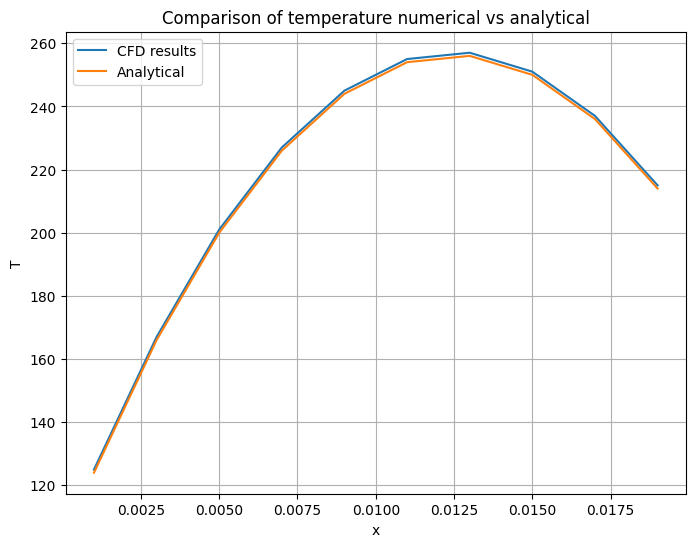

In [62]:
# plot the results 
analytical_results = analytical_solution(Xc,q,L,k,TA,TB)
plt.figure(figsize=(8, 6))
plt.plot(Xc, T, label='CFD results')
plt.plot(Xc, analytical_results, label='Analytical') 

plt.xlabel('x')
plt.ylabel('T')
plt.title('Comparison of temperature numerical vs analytical')
plt.legend()
plt.grid()
plt.show()

## Discussion

Looking at these results, increasing to N = 10 gives noticably better agreement with the analytical solution.  From class, the error in numerical schemes is a function of delta x. As we are discretizing this domain, the smaller the discretizations (delta x), the smaller the error in each discretization step. 

As you continue to increase N, the CFD solution will continue to converge closer to the analytical solution. If this method was applied in practice, it'd make sense to use a relative high N, as this 1-D steady state conduction problem is computationally inexpensive. 

# Exercise 2   
Modify the code to accomodate a convection boundary condition on the left hand side: convective heat transfer coefficient is 100 W/m2K and free stream temperature is 60 C. TA is unknown under the convective boundary condition. Hint: re-derive the discretized equation for cell 1 (the first cell on the left) and modify A and b to accomodate the solution. 

In [63]:
## Numerical Paramteres
N = 10 # number of cells during discretization 
dx = L/N; # length of each computational cell
Xc = np.zeros(N); # coordinates at the center of each cell
for i in range(0, N):
        Xc[i] = i*dx + 0.5*dx
qsrc=np.zeros(N);
for i in range(0,N):
    qsrc[i] = q; # A constant heat source term for the conduction proble
print(qsrc);

h = 100;
T_amb=60;

[1000000. 1000000. 1000000. 1000000. 1000000. 1000000. 1000000. 1000000.
 1000000. 1000000.]


In [64]:
## Set up A
A = np.zeros((N, N))

# interior cells
for i in range(1, N-1):
    A[i, i]   = -2*k/dx
    A[i, i+1] =  k/dx
    A[i, i-1] =  k/dx
h_eff = 1 / ( (1/h) + (dx/(2*k)) )
# left boundary 
A[0, 0] = -(k/dx + h_eff)  
A[0, 1] =  k/dx              

# right boundary (fixed temperature TB)
A[N-1, N-1] = -3*k/dx
A[N-1, N-2] =  k/dx

In [65]:
## Set up b vector
b = np.zeros(N)
# interior cells
for i in range(1, N-1):
    b[i] = -qsrc[i]*dx

# left boundary
b[0] = -qsrc[0]*dx - h_eff*T_amb 

# right boundary 
b[N-1] = -qsrc[N-1]*dx - 2*k*TB/dx

In [66]:
# solve for Temperature
T = np.linalg.solve(A,b)

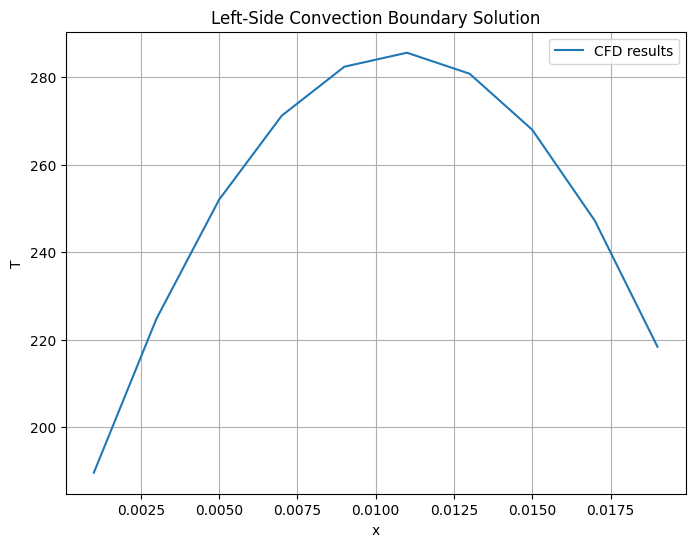

In [67]:
# plot the results 
analytical_results = analytical_solution(Xc,q,L,k,TA,TB)
plt.figure(figsize=(8, 6))
plt.plot(Xc, T, label='CFD results')

plt.xlabel('x')
plt.ylabel('T')
plt.title('Left-Side Convection Boundary Solution')
plt.legend()
plt.grid()
plt.show()